# Télécom Paris - Kit Data Science - Session 4

1. **Parsing XML**
2. **Web scraping et parsing HTML**
3. **API**

### 1. Parsing XML (Extensible Markup Language)

Documentation : https://fr.wikipedia.org/wiki/Extensible_Markup_Language

Librairie lxml : https://lxml.de/tutorial.html

In [1]:
# imports
import pandas as pd
from lxml import etree

# options d'affichage
pd.set_option("display.min_rows", 16)

**Exemple**

Les 150 propositions de la Convention Citoyenne pour le Climat

https://www.data.gouv.fr/fr/datasets/les-150-propositions-de-la-convention-citoyenne-pour-le-climat/

In [2]:
# parsing XML
root = etree.parse('propositions.xml')

In [3]:
# type
type(root)

lxml.etree._ElementTree

In [4]:
# trouver un élément
element = root.find('categorie')

In [5]:
# type
type(element)

lxml.etree._Element

In [6]:
# parent
element.getparent()

<Element propositions at 0x555ab00>

In [7]:
# attribut
element.attrib['titre']

'Modifications de la Constitution et des institutions'

In [8]:
# trouver un élément
element = root.find('categorie').find('sousCategorie').find('proposition')

In [9]:
# text
element.text

'Ajout d\'un alinéa dans le préambule de la Constitution : "La conciliation des droits, libertés et principes qui en résultent ne saurait compromettre la préservation de l’environnement, patrimoine commun de l’humanité."'

In [10]:
# nombre de catégories: getiterator
len([node for node in root.getiterator('categorie')])

6

In [11]:
# nombre de sous-catégories: getiterator
len([node for node in root.getiterator('sousCategorie')])

33

In [12]:
# nombre de propositions: getiterator
len([node for node in root.getiterator('proposition')])

149

In [13]:
# print categorie / sousCategorie / proposition
for node_categorie in root.getiterator('categorie'):
    
    print(node_categorie.attrib['titre'])
    
    for node_sousCategorie in node_categorie.getiterator('sousCategorie'):
        
        print('> ', node_sousCategorie.attrib['titre'])
        
        for node_proposition in node_sousCategorie.getiterator('proposition'):
            
            print('>> ', node_proposition.text)

Modifications de la Constitution et des institutions
>  
>>  Ajout d'un alinéa dans le préambule de la Constitution : "La conciliation des droits, libertés et principes qui en résultent ne saurait compromettre la préservation de l’environnement, patrimoine commun de l’humanité."
>>  Ajout d'un alinéa dans l'article premier de la Constitution : "La République garantit la préservation de la biodiversité, de l'environnement et lutte contre le dérèglement climatique."
>>  Création d'un "Défenseur de l'environnement", sur le modèle du Défenseur des droits
>>  Renforcement du rôle du CESE, le Conseil Economique Social et Environnemental
Se loger
>  Sur la rénovation énergétique des bâtiments
>>  Contraindre les propriétaires occupants et bailleurs à rénover leurs biens de manière globale
>>  Obliger le changement des chaudières au fioul et à charbon d'ici à 2030 dans les bâtiments neufs et rénovés
>>  Déployer un réseau harmonisé de guichets uniques
>>  Système progressif d'aides à la rénova

In [15]:
# fabrication d'un DataFrame à partir d'une liste de dict
liste = [
        {'a': 1, 'b': 2},
        {'a': 3, 'b': 4},
        {'a': 5, 'b': 6, 'c': 7},
        {'a':8, 'd':9}
]

pd.DataFrame(liste)

,a,b,c,d
0,1,2.0,NaN,NaN
1,3,4.0,NaN,NaN
2,5,6.0,7.0,NaN
3,8,NaN,NaN,9.0


In [16]:
# fabrication d'un DataFrame à partir du XML
liste = [
    {'categorie': node_category.attrib['titre'],
    'sousCategorie': node_subcategory.attrib['titre'],
    'proposition': node_proposition.text}
        for node_category in root.getiterator('categorie')
            for node_subcategory in node_category.getiterator('sousCategorie')
                for node_proposition in node_subcategory.getiterator('proposition')]
liste

[{'categorie': 'Modifications de la Constitution et des institutions',
  'sousCategorie': '',
  'proposition': 'Ajout d\'un alinéa dans le préambule de la Constitution : "La conciliation des droits, libertés et principes qui en résultent ne saurait compromettre la préservation de l’environnement, patrimoine commun de l’humanité."'},
 {'categorie': 'Modifications de la Constitution et des institutions',
  'sousCategorie': '',
  'proposition': 'Ajout d\'un alinéa dans l\'article premier de la Constitution : "La République garantit la préservation de la biodiversité, de l\'environnement et lutte contre le dérèglement climatique."'},
 {'categorie': 'Modifications de la Constitution et des institutions',
  'sousCategorie': '',
  'proposition': 'Création d\'un "Défenseur de l\'environnement", sur le modèle du Défenseur des droits'},
 {'categorie': 'Modifications de la Constitution et des institutions',
  'sousCategorie': '',
  'proposition': 'Renforcement du rôle du CESE, le Conseil Economiq

In [17]:
# fabrication d'un DataFrame à partir du XML
liste = [
    {'categorie': node_category.attrib['titre'],
    'sousCategorie': node_subcategory.attrib['titre'],
    'proposition': node_proposition.text}
        for node_category in root.getiterator('categorie')
            for node_subcategory in node_category.getiterator('sousCategorie')
                for node_proposition in node_subcategory.getiterator('proposition')]

df = pd.DataFrame(liste)
df

,categorie,sousCategorie,proposition
0,Modifications de la Constitution et des instit...,,Ajout d'un alinéa dans le préambule de la Cons...
1,Modifications de la Constitution et des instit...,,Ajout d'un alinéa dans l'article premier de la...
2,Modifications de la Constitution et des instit...,,"Création d'un ""Défenseur de l'environnement"", ..."
3,Modifications de la Constitution et des instit...,,"Renforcement du rôle du CESE, le Conseil Econo..."
4,Se loger,Sur la rénovation énergétique des bâtiments,Contraindre les propriétaires occupants et bai...
5,Se loger,Sur la rénovation énergétique des bâtiments,Obliger le changement des chaudières au fioul ...
6,Se loger,Sur la rénovation énergétique des bâtiments,Déployer un réseau harmonisé de guichets uniques
7,Se loger,Sur la rénovation énergétique des bâtiments,"Système progressif d'aides à la rénovation, av..."
...,...,...,...
141,Produire et travailler,Renforcer les obligations relatives à la prése...,Conditionner les aides publiques à l'évolution...


In [18]:
# catégories
df['categorie'].value_counts()

Se déplacer                                             43
Se nourrir                                              42
Produire et travailler                                  25
Se loger                                                21
Consommer                                               14
Modifications de la Constitution et des institutions     4
Name: categorie, dtype: int64

In [19]:
# requêtes
df['proposition'].str.contains('biodiversité').sum()

2

In [20]:
# requêtes
print(*df.loc[df['proposition'].str.contains('biodiversité'), 'proposition'], sep='\n')

Ajout d'un alinéa dans l'article premier de la Constitution : "La République garantit la préservation de la biodiversité, de l'environnement et lutte contre le dérèglement climatique."
Protection des écosystèmes et de la biodiversité


In [21]:
# requêtes
df['proposition'].str.contains('énergie').sum()

3

In [22]:
# requêtes
print(*df.loc[df['proposition'].str.contains('énergie'), 'proposition'], sep='\n')

Contraindre par des mesures fortes les espaces publics et les bâtiments tertiaires à réduire leur consommation d’énergie
Changer en profondeur les comportements en incitant les particuliers à réduire leur consommation d'énergie
Participation des citoyens, entreprises locales, associations locales et collectivités locales aux projets énergies renouvelables (EnR)


In [23]:
# on stocke les propositions pour plus tard
propositions = df['proposition'].copy()

In [ ]:
# f(*args, **kwargs)

**Exercice 1**

Produire un DataFrame avec les colonnes : categorie, sousCategorie, oui (float).

In [25]:
# fabrication d'un DataFrame à partir du XML
liste = [
    {'categorie': node_category.attrib['titre'],
    'sousCategorie': node_subcategory.attrib['titre'],
    'oui': node_oui.text}
        for node_category in root.getiterator('categorie')
            for node_subcategory in node_category.getiterator('sousCategorie')
                for node_oui in node_subcategory.getiterator('oui')]

df = pd.DataFrame(liste)
df["oui"]=df["oui"].str.replace(",",".").astype(float)
df

,categorie,sousCategorie,oui
0,Se loger,Sur la rénovation énergétique des bâtiments,87.3
1,Se loger,Réduire la consommation d'énergie,92.0
2,Se loger,Lutter contre l'artificialisation des sols,99.0
3,Consommer,Affichage,98.8
4,Consommer,Publicité,89.6
5,Consommer,Suremballage,95.9
6,Consommer,Education,97.9
7,Consommer,Suivi et contrôle des politiques publiques env...,95.9
8,Se déplacer,Sortir de l'usage de la voiture en solo,96.4
9,Se déplacer,Aménagements de la voie publique,98.6


**Exercice 2**

- Produire un DataFrame avec les colonnes : categorie, sousCategorie, oui (float), non (float), blancs (float).
- Calculer les sommes oui + non + blancs et oui + non &#9786;

In [43]:
# fabrication d'un DataFrame à partir du XML
liste = [
    {'categorie': node_category.attrib['titre'],
    'sousCategorie': node_subcategory.attrib['titre'],
    'oui': node_vote.find('oui').text,
    'non': node_vote.find('non').text,
    'blancs': node_vote.find('blancs').text,
    }
        for node_category in root.getiterator('categorie')
            for node_subcategory in node_category.getiterator('sousCategorie')
                for node_vote in node_subcategory.getiterator('vote')]

df = pd.DataFrame(liste)
df[["oui","non","blancs"]] = (df[["oui","non","blancs"]]
                              .apply(lambda s: s.str.replace(",","."))
                              .astype(float)
                             )
df

,categorie,sousCategorie,oui,non,blancs
0,Se loger,Sur la rénovation énergétique des bâtiments,87.3,12.7,9.5
1,Se loger,Réduire la consommation d'énergie,92.0,8.0,3.0
2,Se loger,Lutter contre l'artificialisation des sols,99.0,1.0,1.0
3,Consommer,Affichage,98.8,2.0,0.7
4,Consommer,Publicité,89.6,10.4,4.0
5,Consommer,Suremballage,95.9,4.1,2.7
6,Consommer,Education,97.9,2.1,2.7
7,Consommer,Suivi et contrôle des politiques publiques env...,95.9,4.1,2.7
8,Se déplacer,Sortir de l'usage de la voiture en solo,96.4,3.6,4.1
9,Se déplacer,Aménagements de la voie publique,98.6,1.4,2.0


In [45]:
df["oui"]+df["non"]#+df["blancs"]

0     100.0
1     100.0
2     100.0
3     100.8
4     100.0
5     100.0
6     100.0
7     100.0
8     100.0
9     100.0
10    100.0
11    100.0
12    100.0
13    100.0
14    100.0
15    100.0
16    100.0
17    100.0
dtype: float64

**Exercice 3**

- Calculer un dictionnaire fréquentiel des mots  des propositions.
- Le mettre dans un objet de type Series trié par fréquences décroissantes.

In [46]:
# re.findall()
import re
re.findall('[A-Za-zÀ-ÿ0-9]+', 'la fonction findall est très utile.')

['la', 'fonction', 'findall', 'est', 'très', 'utile']

In [47]:
# Counter
from collections import Counter
c = Counter()
c.update(re.findall('[A-Za-zÀ-ÿ0-9]+', 'la fonction findall est très utile.'))
c.update(re.findall('[A-Za-zÀ-ÿ0-9]+', 'un objet Counter est aussi très utile.'))
c

Counter({'la': 1,
         'fonction': 1,
         'findall': 1,
         'est': 2,
         'très': 2,
         'utile': 2,
         'un': 1,
         'objet': 1,
         'Counter': 1,
         'aussi': 1})

In [48]:
propositions

0      Ajout d'un alinéa dans le préambule de la Cons...
1      Ajout d'un alinéa dans l'article premier de la...
2      Création d'un "Défenseur de l'environnement", ...
3      Renforcement du rôle du CESE, le Conseil Econo...
4      Contraindre les propriétaires occupants et bai...
5      Obliger le changement des chaudières au fioul ...
6       Déployer un réseau harmonisé de guichets uniques
7      Système progressif d'aides à la rénovation, av...
                             ...                        
141    Conditionner les aides publiques à l'évolution...
142    Renforcer les clauses environnementales dans l...
143     Protection des écosystèmes et de la biodiversité
144    Ajustement carbone aux frontières de l’UE (en ...
145    Amélioration de la gouvernance territoriale/ré...
146    Participation des citoyens, entreprises locale...
147                  Développement de l’autoconsommation
148    Accompagner l’évolution du numérique pour rédu...
Name: proposition, Length: 149,

In [50]:
c = Counter()
var = propositions.apply(lambda x: re.findall('[A-Za-zÀ-ÿ0-9]+', x.lower()))
var.apply(c.update)
c

Counter({'ajout': 2,
         'd': 61,
         'un': 27,
         'alinéa': 2,
         'dans': 31,
         'le': 49,
         'préambule': 1,
         'de': 190,
         'la': 110,
         'constitution': 2,
         'conciliation': 1,
         'des': 108,
         'droits': 2,
         'libertés': 1,
         'et': 93,
         'principes': 1,
         'qui': 10,
         'en': 69,
         'résultent': 1,
         'ne': 3,
         'saurait': 1,
         'compromettre': 1,
         'préservation': 2,
         'l': 82,
         'environnement': 8,
         'patrimoine': 1,
         'commun': 2,
         'humanité': 1,
         'article': 1,
         'premier': 1,
         'république': 1,
         'garantit': 1,
         'biodiversité': 3,
         'lutte': 2,
         'contre': 2,
         'dérèglement': 1,
         'climatique': 2,
         'création': 2,
         'défenseur': 2,
         'sur': 28,
         'modèle': 3,
         'du': 25,
         'renforcement': 1,
         '

In [52]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [51]:
from nltk.corpus import stopwords
stopwords_fr = stopwords.words('french')
stopwords_fr

['au',
 'aux',
 'avec',
 'ce',
 'ces',
 'dans',
 'de',
 'des',
 'du',
 'elle',
 'en',
 'et',
 'eux',
 'il',
 'ils',
 'je',
 'la',
 'le',
 'les',
 'leur',
 'lui',
 'ma',
 'mais',
 'me',
 'même',
 'mes',
 'moi',
 'mon',
 'ne',
 'nos',
 'notre',
 'nous',
 'on',
 'ou',
 'par',
 'pas',
 'pour',
 'qu',
 'que',
 'qui',
 'sa',
 'se',
 'ses',
 'son',
 'sur',
 'ta',
 'te',
 'tes',
 'toi',
 'ton',
 'tu',
 'un',
 'une',
 'vos',
 'votre',
 'vous',
 'c',
 'd',
 'j',
 'l',
 'à',
 'm',
 'n',
 's',
 't',
 'y',
 'été',
 'étée',
 'étées',
 'étés',
 'étant',
 'étante',
 'étants',
 'étantes',
 'suis',
 'es',
 'est',
 'sommes',
 'êtes',
 'sont',
 'serai',
 'seras',
 'sera',
 'serons',
 'serez',
 'seront',
 'serais',
 'serait',
 'serions',
 'seriez',
 'seraient',
 'étais',
 'était',
 'étions',
 'étiez',
 'étaient',
 'fus',
 'fut',
 'fûmes',
 'fûtes',
 'furent',
 'sois',
 'soit',
 'soyons',
 'soyez',
 'soient',
 'fusse',
 'fusses',
 'fût',
 'fussions',
 'fussiez',
 'fussent',
 'ayant',
 'ayante',
 'ayantes',


In [56]:
s = pd.Series(c)
s = s.drop(stopwords_fr, errors='ignore')
s = s.sort_values(ascending=False)
s.head(30)

place            17
produits         16
plus             15
mettre           14
interdire        10
carbone          10
véhicules         9
loi               9
gaz               8
effet             8
serre             8
usage             8
entreprises       8
environnement     8
plan              8
réduire           8
obligatoire       8
tous              7
transition        7
mise              7
consommation      7
développer        7
développement     7
renforcer         7
émissions         7
rendre            7
national          7
toutes            6
agroécologie      6
mobilité          6
dtype: int64

#### Validation XML / XSD

Il existe un langage de description de schéma XML appelé XSD (XML Schema Definition). Un fichier XML peut être écrit selon un schéma XSD particulier. Il existe une librairie Python qui peut vérifier qu'un fichier XML est valide selon un schéma XSD donné.

Librairie xmlschema :
https://pypi.org/project/xmlschema/

L'utilisation de la librairie est assez simple :

<pre>
>>> # vérification que le fichier "file.xml" est valide dans le schéma "schema.xsd"
>>> import xmlschema
>>> my_schema = xmlschema.XMLSchema('schema.xsd')
>>> #
>>> # retourne un booléen selon la validité
>>> my_schema.is_valid('file.xml')
</pre>

### 2. Web Scraping

- Extraction d'informations d'un site web.
- A utiliser en l'absence de données ouvertes ou d'API.
- Technique fragile car le site web peut changer du jour au lendemain.
- Problématique juridique...

**Avec requests**

Doc :
- requests : https://requests.readthedocs.io/en/master/

Installation :
- *pip install requests* ou *conda install -c anaconda requests*

Exemple de site : https://www.beerwulf.com/fr-fr

In [57]:
import requests

r = requests.get('https://www.beerwulf.com/fr-fr')
r.status_code

200

In [58]:
# content
r.content

b'\r\n\r\n<!doctype html>\r\n<html class="no-js" lang="fr-FR"\r\n      data-original-lang="fr-FR"\r\n      data-rendered-at="Thu, 29 Sep 2022 12:09:35 GMT"\r\n      data-dynamic-ui-url="/fr-FR/api/dynamicUi"\r\n      data-subscription-plans-url="/fr-FR/api/subscription/plans"\r\n      data-subscription-checkout-url="/fr-FR/api/subscription/checkout"\r\n      data-pack-content-api-url="/fr-FR/api/Search/packContent"\r\n      data-is-logged-in-url="/fr-FR/api/account/isLoggedIn"\r\n      data-create-account-url="/fr-FR/api/account/createAccount"\r\n      data-is-subscribed-url="/fr-FR/api/subscription/customerHasSubscriptions"\r\n      data-create-flexible-subscription="/fr-FR/api/subscription/createFlexibleSubscription"\r\n      data-login-url="/fr-FR/api/account/login"\r\n      data-login-modal-url="fr-FR/loginmodal/loginmodal"\r\n      data-release="197"\r\n      data-datalayer=\'{"page":{"type":"Home Page","language":"fr-FR","country":"FR","currency":"EUR"},"event":"pageView"}\'\r\n 

In [59]:
# type
type(r.content)

bytes

In [60]:
# str en précisant un encodage
content = r.content.decode('utf-8')
content

'\r\n\r\n<!doctype html>\r\n<html class="no-js" lang="fr-FR"\r\n      data-original-lang="fr-FR"\r\n      data-rendered-at="Thu, 29 Sep 2022 12:09:35 GMT"\r\n      data-dynamic-ui-url="/fr-FR/api/dynamicUi"\r\n      data-subscription-plans-url="/fr-FR/api/subscription/plans"\r\n      data-subscription-checkout-url="/fr-FR/api/subscription/checkout"\r\n      data-pack-content-api-url="/fr-FR/api/Search/packContent"\r\n      data-is-logged-in-url="/fr-FR/api/account/isLoggedIn"\r\n      data-create-account-url="/fr-FR/api/account/createAccount"\r\n      data-is-subscribed-url="/fr-FR/api/subscription/customerHasSubscriptions"\r\n      data-create-flexible-subscription="/fr-FR/api/subscription/createFlexibleSubscription"\r\n      data-login-url="/fr-FR/api/account/login"\r\n      data-login-modal-url="fr-FR/loginmodal/loginmodal"\r\n      data-release="197"\r\n      data-datalayer=\'{"page":{"type":"Home Page","language":"fr-FR","country":"FR","currency":"EUR"},"event":"pageView"}\'\r\n  

In [62]:
propositions.to_pickle("p.pkl")

In [65]:
with open("p.pkl", "br") as f:
    b = f.read()
    
b.hex()

'80059530540000000000008c1270616e6461732e636f72652e736572696573948c065365726965739493942981947d94288c045f6d6772948c1e70616e6461732e636f72652e696e7465726e616c732e6d616e6167657273948c1253696e676c65426c6f636b4d616e61676572949394298194285d948c1870616e6461732e636f72652e696e64657865732e62617365948c0a5f6e65775f496e6465789493948c1970616e6461732e636f72652e696e64657865732e72616e6765948c0a52616e6765496e6465789493947d94288c046e616d65944e8c057374617274944b008c0473746f70944b958c0473746570944b017586945294615d948c156e756d70792e636f72652e6d756c74696172726179948c0c5f7265636f6e7374727563749493948c056e756d7079948c076e6461727261799493944b0085944301629487945294284b014b958594681c8c0564747970659493948c024f3894898887945294284b038c017c944e4e4e4affffffff4affffffff4b3f749462895d94288ce4416a6f7574206427756e20616c696ec3a9612064616e73206c65207072c3a9616d62756c65206465206c6120436f6e737469747574696f6e203a20224c6120636f6e63696c696174696f6e206465732064726f6974732c206c6962657274c3a973206574207072696e636970657320717569206

In [ ]:
od -c 

In [61]:
type(content)

str

#### Essai avec des regex

On cherche: `<span class="price">...</span>`

In [66]:
# récupération mannuelle d'un prix avec une regex
# extraction de tous les caractères différents de <
# compris entre <span class="price"> et </span>
rx = re.compile('<span class="price">([^<]+)</span>')
match = rx.search(content)  # équivalent à match = re.search('<span class="price">([^<]+)</span>', content)
type(match)

re.Match

In [67]:
# extraction de niveau 0
match.group(0)

'<span class="price">69,99 €</span>'

In [68]:
# extraction de niveau 1
match.group(1)

'69,99 €'

In [69]:
# récupération mannuelle de tous les prix avec une regex
for match in rx.finditer(content):
    print(match.group(1))

69,99 €
16,99 €
15,29 €
12,59 €
13,19 €
23,99 €
22,99 €
22,49 €
19,99 €
22,99 €
17,99 €
24,99 €
19,99 €
23,99 €
149 €
149 €
149 €
125 €
35,99 €
36,99 €
49,99 €
36,99 €
45,99 €
54,99 €
69,99 €
43,16 €
32,99 €
29,99 €
31,99 €


La technique est très fragile car elle s'appuie sur la syntaxe HTML exacte et non sur la sémantique...

In [70]:
# récupération mannuelle de tous les prix avec une regex
rx = re.compile('<span class="price from-price strike-through">([^<]+)</span>')
for match in rx.finditer(content):
    print(match.group(1))

16,99 €
13,99 €
16,49 €
24,99 €
19,99 €
161,97 €
165,46 €
47,96 €


In [71]:
# récupération mannuelle de tous les prix avec une regex
# ( from-price)? est une expression de capture
# possibilité d'utiliser (?: from-price)? qui n'est pas une expression de capture
rx = re.compile('<span class="price( from-price)?( strike-through)?">([^<]+)</span>')
for match in rx.finditer(content):
    print(match.group(1), match.group(2), match.group(3))

None None 69,99 €
None None 16,99 €
 from-price  strike-through 16,99 €
None None 15,29 €
 from-price  strike-through 13,99 €
None None 12,59 €
 from-price  strike-through 16,49 €
None None 13,19 €
None None 23,99 €
None None 22,99 €
 from-price  strike-through 24,99 €
None None 22,49 €
None None 19,99 €
None None 22,99 €
 from-price  strike-through 19,99 €
None None 17,99 €
None None 24,99 €
None None 19,99 €
None None 23,99 €
 from-price  strike-through 161,97 €
None None 149 €
None None 149 €
 from-price  strike-through 165,46 €
None None 149 €
None None 125 €
None None 35,99 €
None None 36,99 €
None None 49,99 €
None None 36,99 €
None None 45,99 €
None None 54,99 €
None None 69,99 €
 from-price  strike-through 47,96 €
None None 43,16 €
None None 32,99 €
None None 29,99 €
None None 31,99 €


**Avec pandas.read_html()** recherche des tableaux dans les pages HTML

**Exemple**

Tableau page wikipédia: https://fr.wikipedia.org/wiki/Liste_des_pays_par_PIB_nominal

In [72]:
# scraping d'une page HTML
var = pd.read_html("https://fr.wikipedia.org/wiki/Liste_des_pays_par_PIB_nominal")
[df.shape for df in var]

[(1, 1), (195, 3), (211, 3), (212, 3), (14, 2), (4, 2), (6, 2)]

In [73]:
# accès au n° 2
df = var[1]
df

,Rang,Pays ou territoire,PIB (en milliards de dollars/an)
0,1,États-Unis,"20 494,05"
1,-,"Union européenne[2],[note 1]","18 750,05"
2,2,Chine[note 2],"13 407,40"
3,3,Japon,"4 971,93"
4,4,Allemagne,"4 000,39"
5,5,Royaume-Uni,"2 828,64"
6,6,France,"2 775,25"
7,7,Inde,"2 716,75"
...,...,...,...
187,187,Tonga,0470


In [76]:
# accès à des valeurs
df.iloc[0]

Rang                                         1
Pays ou territoire                  États-Unis
PIB (en milliards de dollars/an)     20 494,05
Name: 0, dtype: object

In [77]:
# index = columns du DataFrame
df.iloc[0].index

Index(['Rang', 'Pays ou territoire', 'PIB (en milliards de dollars/an)'], dtype='object')

In [78]:
# accès à des valeurs
df.iloc[[0, 1, 2, 76, -1]]

,Rang,Pays ou territoire,PIB (en milliards de dollars/an)
0,1,États-Unis,"20 494,05"
1,-,"Union européenne[2],[note 1]","18 750,05"
2,2,Chine[note 2],"13 407,40"
76,76,Bulgarie,6496
194,194,Tuvalu,00450


In [79]:
# accès à une valeur
df.iloc[1, 2]

'18\xa0750,05'

In [80]:
df.iloc[-1, -1]

'00450'

Chercher le code hexa \xa0 : https://www.codetable.net/hex/a0

In [81]:
# aide sur read_html()
pd.read_html?

In [82]:
# conversion automatique du séparateur des milliers
var = pd.read_html("https://fr.wikipedia.org/wiki/Liste_des_pays_par_PIB_nominal",
                    thousands='\xa0',
                    decimal=',')
df = var[1]
df.iloc[[0, 1, 2, 76, -1]]

,Rang,Pays ou territoire,PIB (en milliards de dollars/an)
0,1,États-Unis,20494.05
1,-,"Union européenne[2],[note 1]",18750.05
2,2,Chine[note 2],13407.40
76,76,Bulgarie,64.96
194,194,Tuvalu,0.0450


In [83]:
# reste à faire
df.loc[df['Pays ou territoire'].str.contains("[^A-Za-zÀ-ÿ0-9 \-']")]

,Rang,Pays ou territoire,PIB (en milliards de dollars/an)
1,-,"Union européenne[2],[note 1]",18750.05
2,2,Chine[note 2],13407.40
11,11,Russie[note 3],1630.66


In [84]:
var = pd.read_html("https://www.geonames.org/countries/")
[x.shape for x in var]

[(1, 2), (250, 9)]

In [85]:
geo = var[1]
geo

,ISO-3166alpha2,ISO-3166alpha3,ISO-3166numeric,fips,Country,Capital,Area in km²,Population,Continent
0,AD,AND,20,AN,Andorra,Andorra la Vella,468.0,77006,EU
1,AE,ARE,784,AE,United Arab Emirates,Abu Dhabi,82880.0,9630959,AS
2,AF,AFG,4,AF,Afghanistan,Kabul,647500.0,37172386,AS
3,AG,ATG,28,AC,Antigua and Barbuda,St. John's,443.0,96286,NaN
4,AI,AIA,660,AV,Anguilla,The Valley,102.0,13254,NaN
5,AL,ALB,8,AL,Albania,Tirana,28748.0,2866376,EU
6,AM,ARM,51,AM,Armenia,Yerevan,29800.0,2951776,AS
7,AO,AGO,24,AO,Angola,Luanda,1246700.0,30809762,AF
...,...,...,...,...,...,...,...,...,...
242,WF,WLF,876,WF,Wallis and Futuna,Mata Utu,274.0,16025,OC


Reste à faire :

Extraire les noms des pays sans les annotations.

**Avec beautifulsoup** parsing HTML

Doc :
- beautifulsoup : https://www.crummy.com/software/BeautifulSoup/bs4/doc/

Installation :
- *pip install beautifulsoup4* ou *conda install -c anaconda beautifulsoup4*

In [86]:
# imports
from bs4 import BeautifulSoup

**Exemple basique**

In [87]:
html = """
<html>
    <head>
        <style>
        h1 { font-size: 50px; }
        body { font-family: Verdana; }
        li { color: red; }
        ul ul li { color: green; }
        .highlighted { font-weight: bold; }
        .italic { font-style: italic; }
        .highlighted.italic { }
        </style>
    </head>
    <body>
        <h1>Mon titre</h1>
        <p class="highlighted">
            Some text with a<br>
            <a href="https://google.com">link to google</a>
            <img src="https://picsum.photos/200/300">
        </p>
        <p>Some list:</p>
        <ul>
            <li>some item</li>
            <li class="highlighted italic">some item</li>
            <li class="italic">some item</li>
            <ul>
                <li>some other item 1</li>
                <li>some other item 2</li>
            </ul>
            <li>some item</li>
        </ul>
    </body>
</html>
"""

A tester sur : https://html.house

In [88]:
# bs4
soup = BeautifulSoup(html)
soup

<html>
<head>
<style>
        h1 { font-size: 50px; }
        body { font-family: Verdana; }
        li { color: red; }
        ul ul li { color: green; }
        .highlighted { font-weight: bold; }
        .italic { font-style: italic; }
        .highlighted.italic { }
        </style>
</head>
<body>
<h1>Mon titre</h1>
<p class="highlighted">
            Some text with a<br/>
<a href="https://google.com">link to google</a>
<img src="https://picsum.photos/200/300"/>
</p>
<p>Some list:</p>
<ul>
<li>some item</li>
<li class="highlighted italic">some item</li>
<li class="italic">some item</li>
<ul>
<li>some other item 1</li>
<li>some other item 2</li>
</ul>
<li>some item</li>
</ul>
</body>
</html>

In [89]:
# type
type(soup)

bs4.BeautifulSoup

In [90]:
# find h1
titre = soup.find('h1')
titre

<h1>Mon titre</h1>

In [91]:
# type
type(titre)

bs4.element.Tag

In [92]:
# name
titre.name

'h1'

In [93]:
# text
titre.text

'Mon titre'

In [94]:
# find a
link = soup.find('a')
link

<a href="https://google.com">link to google</a>

In [95]:
# prochain tag
link.find_next()

<img src="https://picsum.photos/200/300"/>

In [96]:
link.find_next().find_next()

<p>Some list:</p>

In [97]:
# attrs
link.attrs

{'href': 'https://google.com'}

In [98]:
# text
link.text

'link to google'

In [99]:
# find p
paragraph = soup.find('p')
paragraph

<p class="highlighted">
            Some text with a<br/>
<a href="https://google.com">link to google</a>
<img src="https://picsum.photos/200/300"/>
</p>

In [100]:
# find img in paragraph
paragraph.find('img')

<img src="https://picsum.photos/200/300"/>

In [101]:
# find_all
soup.find_all('li')

[<li>some item</li>,
 <li class="highlighted italic">some item</li>,
 <li class="italic">some item</li>,
 <li>some other item 1</li>,
 <li>some other item 2</li>,
 <li>some item</li>]

In [102]:
# find_all
soup.find_all('li', {'class': "italic"})

[<li class="highlighted italic">some item</li>,
 <li class="italic">some item</li>]

In [103]:
# idem avec un sélecteur css:
soup.select('li.italic')

[<li class="highlighted italic">some item</li>,
 <li class="italic">some item</li>]

In [104]:
# Récupérer les li de 2e niveau qui sont dans un ul lui-même dans un ul
soup.find('ul').find('ul').find_all('li')

[<li>some other item 1</li>, <li>some other item 2</li>]

In [105]:
# idem avec un sélecteur css:
soup.select('ul ul li')

[<li>some other item 1</li>, <li>some other item 2</li>]

In [106]:
# accès au premier li
li = soup.select('ul ul li')[0]
li

<li>some other item 1</li>

In [107]:
# prochain tag identique
li.find_next_sibling()

<li>some other item 2</li>

In [108]:
# parent
li.parent

<ul>
<li>some other item 1</li>
<li>some other item 2</li>
</ul>

In [109]:
# contents
li.parent.contents

['\n', <li>some other item 1</li>, '\n', <li>some other item 2</li>, '\n']

In [110]:
# que les tags
li.parent.find_all()

[<li>some other item 1</li>, <li>some other item 2</li>]

**Exemple 1**

Le Bon Coin

In [111]:
# premier essai avec leboncoin

r = requests.get('https://www.leboncoin.fr/annonces/offres/ile_de_france/')
r

<Response [403]>

Codes erreurs du protocole HTTP : https://developer.mozilla.org/fr/docs/Web/HTTP/Status

In [112]:
# contenu
r.content

b'<html><head><title>leboncoin.fr</title><meta property="og:title" content="Rendez-vous sur leboncoin pour d\xc3\xa9couvrir cette annonce !" />\r\n<meta property="og:image" content="https://img.datadome.co/captcha/page-customization/1872/866d27bc-26b6-476e-b41d-496f3e0a7fb4.jpeg" /><style>#cmsg{animation: A 1.5s;}@keyframes A{0%{opacity:0;}99%{opacity:0;}100%{opacity:1;}}</style></head><body style="margin:0"><p id="cmsg">Please enable JS and disable any ad blocker</p><script data-cfasync="false">var dd={\'cid\':\'AHrlqAAAAAMAfy42crC0QJgAicKeBA==\',\'hsh\':\'05B30BD9055986BD2EE8F5A199D973\',\'t\':\'bv\',\'s\':2089,\'e\':\'8ed7b31499bedd6fb7889905ab8ff4ff55c39a03e62b06a326a1e3014fa56b75\',\'host\':\'geo.captcha-delivery.com\'}</script><script data-cfasync="false" src="https://ct.captcha-delivery.com/c.js"></script></body></html>\n'

In [113]:
# en str
print(r.content.decode('utf-8'))

<html><head><title>leboncoin.fr</title><meta property="og:title" content="Rendez-vous sur leboncoin pour découvrir cette annonce !" />
<meta property="og:image" content="https://img.datadome.co/captcha/page-customization/1872/866d27bc-26b6-476e-b41d-496f3e0a7fb4.jpeg" /><style>#cmsg{animation: A 1.5s;}@keyframes A{0%{opacity:0;}99%{opacity:0;}100%{opacity:1;}}</style></head><body style="margin:0"><p id="cmsg">Please enable JS and disable any ad blocker</p><script data-cfasync="false">var dd={'cid':'AHrlqAAAAAMAfy42crC0QJgAicKeBA==','hsh':'05B30BD9055986BD2EE8F5A199D973','t':'bv','s':2089,'e':'8ed7b31499bedd6fb7889905ab8ff4ff55c39a03e62b06a326a1e3014fa56b75','host':'geo.captcha-delivery.com'}</script><script data-cfasync="false" src="https://ct.captcha-delivery.com/c.js"></script></body></html>



In [114]:
# headers
headers = requests.utils.default_headers()
headers.update({'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36',
               'Accept-Language': 'fr,fr-FR;',})
headers

{'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive', 'Accept-Language': 'fr,fr-FR;'}

In [115]:
# 2nd essai avec leboncoin
r = requests.get('https://www.leboncoin.fr/annonces/offres/ile_de_france/',
                 headers=headers)
r

<Response [403]>

**Exemple 2**

Craig List

In [130]:
# essai avec craigslist
r = requests.get('https://paris.craigslist.org/search/vac',
                 headers=headers)
r

<Response [200]>

In [144]:
# essai avec craigslist
r = requests.get('https://london.craigslist.org/search/apa',
                 headers=headers)
r

<Response [200]>

In [126]:
#with open('Paris Locations de vacances - craigslist.htm', 'rb') as f:
#    content = f.read()
#content

b'<!DOCTYPE html>\n<html>\n<head>\n    \n\t<meta charset="UTF-8">\n\t<meta http-equiv="X-UA-Compatible" content="IE=Edge">\n\t<meta name="viewport" content="width=device-width,initial-scale=1">\n\t<meta property="og:site_name" content="craigslist">\n\t<meta name="twitter:card" content="preview">\n\t<meta property="og:title" content="Paris Locations de vacances - craigslist">\n\t<meta name="description" content="Paris Locations de vacances - craigslist">\n\t<meta property="og:description" content="Paris Locations de vacances - craigslist">\n\t<meta property="og:url" content="https://paris.craigslist.org/d/locations-de-vacances/search/vac">\n\t<title>Paris Locations de vacances - craigslist</title>\n\t<link rel="canonical" href="https://paris.craigslist.org/d/locations-de-vacances/search/vac">\n\n\n\n<script type="application/ld+json" id="ld_breadcrumb_data" >\n    {"@context":"https://schema.org","itemListElement":[{"item":{"name":"paris.craigslist.org","@id":"https://paris.craigslist.o

In [145]:
# BeautifulSoup
soup = BeautifulSoup(r.content)
soup

<!DOCTYPE html>
<html>
<head>
<meta charset="utf-8"/>
<meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width,initial-scale=1" name="viewport"/>
<meta content="craigslist" property="og:site_name"/>
<meta content="preview" name="twitter:card"/>
<meta content="london, UK apartments / housing for rent - craigslist" property="og:title"/>
<meta content="london, UK apartments / housing for rent - craigslist" name="description"/>
<meta content="london, UK apartments / housing for rent - craigslist" property="og:description"/>
<meta content="https://london.craigslist.org/search/apa" property="og:url"/>
<meta content="true" name="smartbanner:api"/>
<meta content="the craigslist app" name="smartbanner:title"/>
<meta content="what's old is new" name="smartbanner:author"/>
<meta content="/images/app_icon.png" name="smartbanner:icon-apple"/>
<meta content="/images/app_icon.png" name="smartbanner:icon-google"/>
<meta content="view" name="smartbanner:button"/>
<meta c

On utilise 2 méthodes :
    
- `find(tag, attrs)` : trouve le premier tag avec les attributs spécifiés
- `findAll(tag, attrs)` : trouve tous les tags avec les attributs spécifiés

In [132]:
# exploration du HTML
# tag li avec class="result-row"

li_tag = soup.find('li', attrs={'class': 'result-row'})
print(li_tag)

<li class="result-row" data-pid="7535809272" data-repost-of="7492541970">
<a class="result-image gallery empty" href="https://paris.craigslist.org/vac/d/marais-two-bedrooms-sleeps-wifi-air/7535809272.html"></a>
<div class="result-info">
<span class="icon icon-star" role="button">
<span class="screen-reader-text">marquez cette publication comme favorite</span>
</span>
<time class="result-date" datetime="2022-09-19 21:15" title="lun. 19 sept. 21:15:24">sept. 19</time>
<h3 class="result-heading">
<a class="result-title hdrlnk" data-id="7535809272" href="https://paris.craigslist.org/vac/d/marais-two-bedrooms-sleeps-wifi-air/7535809272.html" id="postid_7535809272">Marais Two Bedrooms, Sleeps 6, Wifi, Air Conditioning</a>
</h3>
<span class="result-meta">
<span class="result-price">€90</span>
<span class="housing">
                    2br -
                    904m<sup>2</sup> -
                </span>
<span class="result-hood"> (Rue Jean Beausire)</span>
<span class="result-tags">
</span>
<s

In [ ]:
# type
type(li_tag)

La technique consiste par exemple à alimenter une liste de dictionnaires avec les valeurs trouvées pour chaque item et ensuite à le transformer en DataFrame :
- soit en utilisant `tag.attrs['attr']` pour collecter la valeur attr du tag <tag attr=value>
- soit en utilisant `tag.text` pour collecter la valeur <tag>text</tag>
- éventuellement en recherchant dans un nouveau tag à l'intérieur d'un tag donné

In [147]:
# collecte des informations
# "data-pid"
# "time"
# "title"
# "price"
# "housing"
# "hood"
# "data-ids" (images)

rows = []

for li_tag in soup.findAll('li', attrs={'class': 'result-row'}):
    row = {}
    row['data-pid'] = li_tag.attrs['data-pid']
    t = li_tag.find('time')
    row['datetime'] = t.attrs['datetime']
    # à compléter
    a_tag = li_tag.find('a', attrs={'class': 'result-title'})
    row['title'] = a_tag.text
    span_tag = li_tag.find('span', attrs={'class': 'result-price'})
    row['price'] = span_tag.text
    span_tag = li_tag.find('span', attrs={'class': 'housing'})
    row['housing'] = span_tag.text
    span_tag = li_tag.find('span', attrs={'class': 'result-hood'})
    row['hood'] = span_tag.text if span_tag is not None else ""
    rows.append(row)
    
rows

[{'data-pid': '7533574355',
  'datetime': '2022-09-14 01:49',
  'title': 'ROOMS TO LET FOR THIS WEEKEND',
  'price': '£350',
  'housing': '\n                    2br -\n                    600m2 -\n                ',
  'hood': ' (LONDON)'},
 {'data-pid': '7532899296',
  'datetime': '2022-09-12 16:37',
  'title': 'DETACHED 3 BEDROOM HOUSE ON RENT',
  'price': '£2,000',
  'housing': '\n                    3br -\n                    2000m2 -\n                ',
  'hood': ' (ASHFORD, FELTHAM ROAD)'},
 {'data-pid': '7531997448',
  'datetime': '2022-09-10 01:13',
  'title': 'LONDON BRIDGE-  1 bed flat',
  'price': '£950',
  'housing': '\n                    1br -\n                ',
  'hood': ' (London Bridge)'},
 {'data-pid': '7531761661',
  'datetime': '2022-09-09 16:37',
  'title': 'pw - STUNNING LARGE DOUBLE STUDIO FLAT FOR RENT, Bloomsbury, WC1',
  'price': '£380',
  'housing': '\n                    1br -\n                ',
  'hood': ' (Gower Street)'},
 {'data-pid': '7531658731',
  'd

In [148]:
# en DataFrame
df = pd.DataFrame(rows)
df

,data-pid,datetime,title,price,housing,hood
0,7533574355,2022-09-14 01:49,ROOMS TO LET FOR THIS WEEKEND,£350,\n 2br -\n ...,(LONDON)
1,7532899296,2022-09-12 16:37,DETACHED 3 BEDROOM HOUSE ON RENT,"£2,000",\n 3br -\n ...,"(ASHFORD, FELTHAM ROAD)"
2,7531997448,2022-09-10 01:13,LONDON BRIDGE- 1 bed flat,£950,\n 1br -\n,(London Bridge)
3,7531761661,2022-09-09 16:37,pw - STUNNING LARGE DOUBLE STUDIO FLAT FOR REN...,£380,\n 1br -\n,(Gower Street)
4,7531658731,2022-09-09 09:49,1 bedroom flat to rent,£800,\n 1br -\n,"(Granville Place, High Road, London One bedro..."
5,7529336699,2022-09-03 12:12,CHIC AND SAFE ! CHELSEA FLAT SHORT /LONG LET: ...,£440,\n 1br -\n ...,(384 Kings Road)
6,7524163346,2022-08-21 17:58,Accomodation,£550,\n 1br -\n,


**Exercice 4**

Compléter le DataFrame (sauf images)

#### Inconvénients du web scraping:
- plutôt lent (car on parse potentiellement beaucoup de HTML inutile)
- ne donne pas les résultats attendus si une partie du contenu est intégré dynamiquement à la page via javascript
- un changement dans l'architecture du html ou du css (e.g: refonte du design du site) oblige à réécrire entièrement le programme

### API

Exemple: Deezer

Artiste : https://www.deezer.com/fr/artist/3037

Récupérer le nombre de fans d'un artiste avec requests :

In [149]:
import requests
from bs4 import BeautifulSoup
# request
artist = 3037
response = requests.get(f'https://www.deezer.com/fr/artist/{artist}')
soup = BeautifulSoup(response.content)
nb_fans = int(soup.find('div', id='naboo_artist_social_small').span.text)
nb_fans

810559

Récupérer le nombre de fans d'un artiste avec l'API :

Doc:
- https://pypi.org/project/deezer-python/

Installation :
- *pip install deezer-python*

Le terme "API" est très générique et peut désigner bien des choses, mais dans le jargon on l'utilise souvent pour désigner un service web qui renvoie non pas:
> des pages web au format HTML (destinées à être lues par un humain dans son navigateur)

mais:
> des données au format JSON (destinées à être traitées par un programme)

![img](https://miro.medium.com/max/4238/1*OcmVkcsM5BWRHrg8GC17iw.png)

Puisque les API sont dédiées à l'usage via des programmes, elles disposent en général d'une bonne documentation, et sont fiables et stables dans le temps. Tandis que sur des pages web HTML classiques, le design peut par exemple changer du jour au lendemain et rendre votre programme BeautifulSoup obsolète.

In [150]:
# API JSON
response = requests.get(f'https://api.deezer.com/artist/{artist}')
data = response.json()
data

{'id': 3037,
 'name': 'Genesis',
 'link': 'https://www.deezer.com/artist/3037',
 'share': 'https://www.deezer.com/artist/3037?utm_source=deezer&utm_content=artist-3037&utm_term=0_1664458781&utm_medium=web',
 'picture': 'https://api.deezer.com/artist/3037/image',
 'picture_small': 'https://e-cdns-images.dzcdn.net/images/artist/c0ed2cf09c7bf072111d614fc4557b66/56x56-000000-80-0-0.jpg',
 'picture_medium': 'https://e-cdns-images.dzcdn.net/images/artist/c0ed2cf09c7bf072111d614fc4557b66/250x250-000000-80-0-0.jpg',
 'picture_big': 'https://e-cdns-images.dzcdn.net/images/artist/c0ed2cf09c7bf072111d614fc4557b66/500x500-000000-80-0-0.jpg',
 'picture_xl': 'https://e-cdns-images.dzcdn.net/images/artist/c0ed2cf09c7bf072111d614fc4557b66/1000x1000-000000-80-0-0.jpg',
 'nb_album': 27,
 'nb_fan': 810559,
 'radio': True,
 'tracklist': 'https://api.deezer.com/artist/3037/top?limit=50',
 'type': 'artist'}

In [151]:
# nb_fan
data['nb_fan']

810559

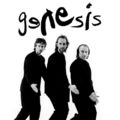

In [152]:
# picture
from IPython.display import Image
url = data['picture']
r = requests.get(url)
Image(data=r.content)

#### Avantages d'une API
- renvoie du format JSON, facile et rapide à traiter
- renvoie un format stable et documenté (voire versionné)
- exemple : https://developer.twitter.com/en/docs/twitter-api/api-reference-index
- la documentation indique comment interagir avec l'API:
    - quelle url
    - quelle méthode http (GET, POST, ...)
    - quels paramètres
    - ...
→ idéal pour les développeurs

### Quel intérêt pour le fournisseur d'API ?

En général il met en place des quotas de requêtes ou d'autres limitations afin de proposer un service payant qui dispose de possibilités avancées / d'un meilleur support / etc.

C'est pourquoi de nombreux services nécessitent de se connecter avec son compte client pour utiliser une API (e.g. https://openweathermap.org/api)

#### **Basic Auth**

Exemple: accéder à https://kim.fspot.org/private/

Pour y accéder il est nécessaire d'utiliser les credentials suivant:
- login: admin
- password: secret

Si on ne les passe pas (ou si on ne passe pas les bons), on a une erreur 401 (= unauthorized).

In [153]:
# sans login/password
res = requests.get('https://kim.fspot.org/private')
res

<Response [401]>

In [154]:
# avec login password
res = requests.get('https://kim.fspot.org/private', auth=('admin', 'secret'))
res

<Response [200]>

In [155]:
# contenu
res.content.decode('utf-8')

'<!doctype html>\n<html>\n<head>\n<title>Success</title>\n</head>\n<body>\n\t<h1>Well done!</h1>\n</body>\n</html>\n'

In [ ]:
# YAML pour masquer auth crendentials

#### Auth par token

Exemple sur openweathermap :
- documentation: https://openweathermap.org/appid
- mes tokens: https://home.openweathermap.org/api_keys

In [156]:
# requête avec un token
token = ''

Avantage des tokens:
- évite que les requêtes HTTP contiennent le mot de passe - à la place elles contiennent un token
- si je me fais "voler" un token, je peux le supprimer de mon compte
- certains services fournissent des token plus ou moins limités : ainsi je peux accepter de prêter un token à quelqu'un d'autre si je sais qu'il ne pourra en faire qu'un usage restreint (e.g app facebook: voir mes infos de profil, pas publier des posts à ma place)

In [158]:
# requête avec un token
url = f'http://api.openweathermap.org/data/2.5/weather?APPID={token}&q=Palaiseau'
res = requests.get(url)

meteo = res.json()
meteo

{'coord': {'lon': 2.25, 'lat': 48.7167},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 286.49,
  'feels_like': 285.92,
  'temp_min': 285.7,
  'temp_max': 288.89,
  'pressure': 1003,
  'humidity': 78},
 'visibility': 10000,
 'wind': {'speed': 3.09, 'deg': 30},
 'clouds': {'all': 100},
 'dt': 1664459685,
 'sys': {'type': 2,
  'id': 2033814,
  'country': 'FR',
  'sunrise': 1664430429,
  'sunset': 1664472929},
 'timezone': 7200,
 'id': 2988758,
 'name': 'Palaiseau',
 'cod': 200}

In [159]:
# type
type(meteo)

dict

In [160]:
# extractions
{'city': meteo['name'],
'country': meteo['sys']['country'],
'date': meteo['dt'],
'temp': meteo['main']['temp'] - 273.15,}

{'city': 'Palaiseau',
 'country': 'FR',
 'date': 1664459685,
 'temp': 13.340000000000032}

In [161]:
# extractions
import time

{'city': meteo['name'],
'country': meteo['sys']['country'],
'date': time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(meteo['dt'])),
'temp': meteo['main']['temp'] - 273.15,}

{'city': 'Palaiseau',
 'country': 'FR',
 'date': '2022-09-29 15:54:45',
 'temp': 13.340000000000032}